# Trabalho CE2 - Eredivisie vs Primeira Liga

Professor Eduardo Monteiro

Matheus Erbisti - 180024990

Ramon Moreira - 180036980

## Introdução

É de amplo conhecimento que as melhores ligas nacionais de futebol da Europa são da Inglaterra (Premier League), Espanha (La Liga), Itália (Serie A), Alemanha (Bundesliga) e França (Ligue One); para efeito demonstrativo, a última conquista da Champions League (torneio continental dos melhores clubes europeus) por um time fora desse top 5 foi em 2003/04.

Nesse contexto, o objetivo desse seminário é descobrir qual seria a 6ª melhor liga da Europa. Devido à história e tradição dos times, escolhemos o campeonato holandês (Eredivisie) e português (Primeira Liga) para concorrer nessa posição.

Ambos os bancos de dados e suas informações foram tirados do site www.football-data.co.uk, referentes à temporada 2018/2019 dos dois campeonatos. Não foram feitas mudanças significativas como limpeza de dados, apenas criações de novas variáveis que serão detalhadas à frente.

### Importação de Pacotes e Dados

Aqui estão todos os pacotes e os bancos de dados utilizados.

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
import scipy.stats as est
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
holandes = pd.read_csv("Holandes.csv")
portugues = pd.read_csv("Portugues.csv")

warnings.filterwarnings("ignore")

Os dois bancos de dados tem uma estrutura de 306 linhas por 61 colunas, isso é, 61 variáveis e 306 observações. Contudo, nem todas as variáveis serão utilizadas; segue uma lista e breve explicação das variáveis mais importantes:

* HomeTeam e AwayTeam - Identificação das equipes mandantes e visitantes da partida (Variável qualitativa).

* FTHG e FTAG (Full Time Home/Away Goals) - Total de gols na partida da equipe da casa e dos visitantes (Variável quantitativa discreta).

* FTR (Full Time Result) - Qual time ganhou a partida (Variável qualitativa).

* HS e AS (Home/Away Shots) - Quantidade de chute do time mandante ou visitante na partida (Variável quantitativa discreta).

* HST e AST (Home/Away Shots on Target) - Quantidades de chute do time mandante ou visitante que foram no gol durante a partida (Variável quantitativa discreta).

* HY, HR, AY e AR (Home/Away Yellow/Red Cards) - Número de cartões amarelo ou vermelho que o time mandante ou visitante receberam durante a partida (Variável quantitativa discreta).

* HF e AF (Home/Away Fouls) - Número de faltas cometidas pelo time da casa ou de fora (Variável quantitativa discreta).

* B365H, B365A e B365D - "Odds" fornecido pelo site Bet365 sobre o time vencedor ser o mandante, visitante ou dar empate (Variável quantitativa contínua). 


In [65]:
holandes.iloc[:,[2,3,4,5,6,10,11,12,13,14,15,18,19,20,21,22,23,24]].head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A
0,Zwolle,Heerenveen,2,3,A,18,7,4,3,13,11,2,5,0,1,2.40,3.6,2.7
1,Ajax,Heracles,1,1,D,17,11,7,2,13,25,0,3,0,0,1.12,8.0,19.0
2,Excelsior,For Sittard,1,1,D,13,18,3,6,12,11,3,1,1,0,2.10,3.5,3.3
3,PSV Eindhoven,Utrecht,4,0,H,14,6,10,2,11,12,2,2,0,0,1.40,5.0,6.5
4,Willem II,VVV Venlo,0,1,A,15,7,6,1,11,18,2,2,0,0,2.25,3.4,3.1


In [66]:
portugues.iloc[:,[2,3,4,5,6,10,11,12,13,14,15,18,19,20,21,22,23,24]].head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A
0,Benfica,Guimaraes,3,2,H,9,9,7,5,15,24,0,4,0,0,1.25,5.75,11.0
1,Porto,Chaves,5,0,H,14,2,6,0,11,12,0,2,0,1,1.14,7.00,21.0
2,Setubal,Aves,2,0,H,13,2,5,1,17,16,2,3,0,2,2.25,3.10,3.4
3,Tondela,Belenenses,0,1,A,14,6,4,3,15,13,2,2,1,0,2.25,3.10,3.4
4,Feirense,Rio Ave,2,0,H,12,7,5,1,17,9,1,2,0,0,3.00,3.00,2.5


## Análise Descritiva

### Odds de vitória

Odds são probabilidades dentro de um determinado evento, para análise será utilizado os odds da Bet365.Quanto mais próximo de 1, mais favorito é o time. Para saber as chances de um evento acontecer, com base nos odds, basta $\frac{1}{\text{Odds}}$. Primeiro veremos os odds para que haja uma vitória, tanto para os times mandantes quanto para os visitante.


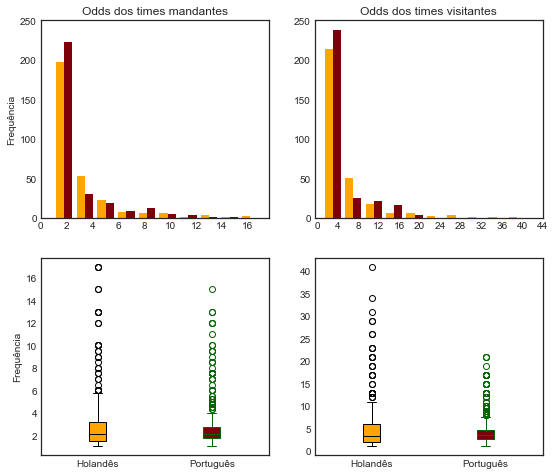

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,3.100033,2.944542,5.377484,4.923954
std,2.850247,2.363847,5.915622,4.217440
min,1.020000,1.080000,1.080000,1.160000
25%,1.500000,1.762500,2.072500,2.605000
50%,2.100000,2.140000,3.300000,3.600000
75%,3.200000,2.700000,6.000000,4.750000
max,17.000000,15.000000,41.000000,21.000000


In [48]:
## Selecionando as variáveis com os odds para vitória
# Mandantes
oddH = [holandes.B365H, portugues.B365H]
# Visitantes
oddA = [holandes.B365A, portugues.B365A]

# Gráficos
fig, ((graf1, graf2), (graf3, graf4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8))
hist = (graf1, graf2)
odds = [[holandes.B365H, portugues.B365H], [holandes.B365A, portugues.B365A]]
local = ["mandantes", "visitantes"]
saltos = [2,4]
amplitude = [18,45]
for i in range(2):
    hist[i].hist(odds[i], color = ["orange", "#7E0008"])
    hist[i].set_ylim(0, 250)
    hist[i].xaxis.set_ticks(np.arange(0, amplitude[i], saltos[i]))
    hist[i].set_title(str("Odds dos times " + local[i]))


cores = ["orange", "#7E0008", "black", "#006400"]
boxs = (graf3, graf4)

for i in range(2):
    for j in range(2):
        boxs[j].boxplot(odds[j][i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 2]),
                               capprops = dict(color = cores[i + 2]),
                               whiskerprops = dict(color = cores[i + 2]),
                               flierprops = dict(color = cores[i + 2], markeredgecolor = cores[i + 2]),
                               medianprops = dict(color = cores[i + 2]))


for i in (graf1, graf3):
    i.set_ylabel("Frequência")

for i in range(2):
    boxs[i].set_xticklabels(['Holandês', 'Português'])
plt.show()
# Tabela descritiva
dados = {'holandes_casa': holandes.B365H, 'portugues_casa': portugues.B365H,
         'holandes_fora': holandes.B365A, 'portugues_fora': portugues.B365A}

odds_v = pd.DataFrame(data = dados)

odds_v.describe()

**Parte dos mandantes**

Através do histograma vemos que a maior parte dos odds estão próximo de 2(50% de chance de vitória), é de se esperar que a equipe mandante tenha mais chances de vitória. Pelo boxplot é possível notar vários outliers, com odds que passam de 10(10% de chance de vitória), provavelmente são partidas depois da primeira metade do campeonato, onde equipes que estão brigando pelo título enfrentam adversários da parte de baixo da tabela. O valor mínimo mostra uma partida extremamente favorável para a equipe mandante(98% de chance de vitória no holandês e 92,6% no português), já o valor máximo mostra o contrário, uma partida onde a equipe mandante tem a menor probabilidade de vitória(5,9% no holandês e 6,7% no português).

Quando comparamos as duas ligas, é possível notar uma maior variabilidade dos odds no campeonato Holandês. Além disso, nota-se que o valor do primeiro quartil é menor no campeonato holandês do que no português, isso mostra que em 25% dos jogos a equipe mandante teve mais de 66% de chance de vitória no campeonato holandês, contra 57% no português. O valor da mediana está bem próximo, já o terceiro quartil mostra que as equipes mandantes que não são favoritas para vencer o jogo têm mais chances no campeonato português do que no holandês.

**Parte dos visitantes**

Já com as equipes visitantes os valores dos odds estão próximos de 3.5(28.6% de chance de vitória) e a variabilidade no campeonato holandês continua maior. A distribuição é parecida com o das equipes mandantes, porém aqui os odds são maiores, com o primeiro quartil acima de 2 em ambos campeonatos. É interessante notar que a diferença no terceiro quartil aumentou consideravelmente, além disso vemos outliers mais extremos no campeonato holandês.   

### Odds de empate

As odds de empate estão separadas porque são um caso à parte.

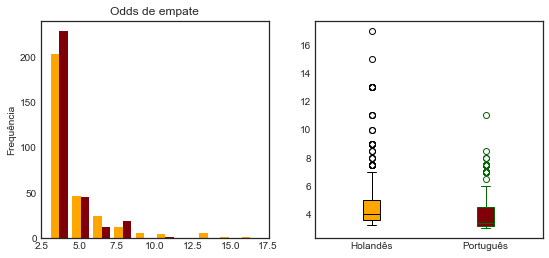

,holandes_empate,portugues_empate
count,306.000000,306.000000
mean,4.789837,4.019575
std,2.122593,1.352653
min,3.250000,3.000000
25%,3.600000,3.200000
50%,4.000000,3.400000
75%,5.000000,4.500000
max,17.000000,11.000000


In [67]:
# Selecionando a variável
oddD = [holandes.B365D, portugues.B365D]

# Detalhes dos gráficos
cores = ["orange", "#7E0008", "black", "#006400"]
legendas = ["Holandês", "Português"]

# Montagem do gráfico
fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.hist(oddD, color = ["orange", "#7E0008"])

for i in range(2):
    graf2.boxplot(oddD[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 2]),
                               capprops = dict(color = cores[i + 2]),
                               whiskerprops = dict(color = cores[i + 2]),
                               flierprops = dict(color = cores[i + 2], markeredgecolor = cores[i + 2]),
                               medianprops = dict(color = cores[i + 2]))
      
graf1.set_title('Odds de empate')
graf1.set_ylabel("Frequência")
graf2.set_xticklabels(legendas)

plt.show()

# Tabela descritiva
dados = {'holandes_empate': holandes.B365D, 'portugues_empate': portugues.B365D}

odds_e = pd.DataFrame(data = dados)

odds_e.describe()

Com relação ao empate, os odds são mais altos(a chance de ocorrer é menor) e grande parte está em torno de 4(25% de chance de ocorrer empate). Algo que chama a atenção é que a maior probabilidade de ocorrer empate foi de algo em torno de 30% para os dois campeonatos.
Comparando as 2 ligas vemos que as chances de ocorrer empate na liga portuguesa é maior, com uma variabilidade menor. Isto pode ocorrer por conta do ataque, defesa ou nível semelhante das equipes. Uma análise de outras variáveis pode esclarecer este assunto.

### Gols por jogo

Essa variável é possivelmente a mais importante de todo o banco de dados. Afinal, o gol é o ápice do jogo de futebol, e é o que torna o jogo emocionante, seja pela dificuldade, quantidade ou falta dos gols.

Dessa forma, podemos enxergar os dados de gols por jogo da seguinte maneira:

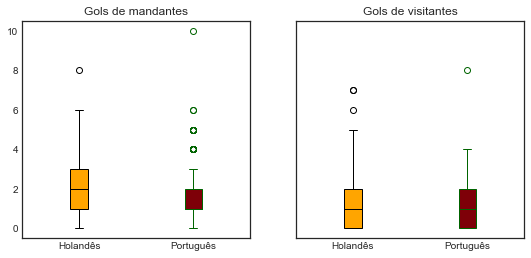

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,2.006536,1.522876,1.460784,1.176471
std,1.584750,1.412288,1.416564,1.168536
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000
max,8.000000,10.000000,7.000000,8.000000


In [50]:
plt.style.use('seaborn-white')
# Selecionando as variáveis
gols = [[holandes.FTHG, portugues.FTHG], [holandes.FTAG, portugues.FTAG]]
# Detalhes dos gráficos
cores = ["orange", "#7E0008", "black", "#006400"]
legendas = ["Holandês", "Português"]
local = ["mandantes", "visitantes"]

# Montagem do gráfico
fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4), sharey = True)

grafs = (graf1, graf2)

for i in range(2):
    for j in range(2):
        grafs[j].boxplot(gols[j][i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 2]),
                               capprops = dict(color = cores[i + 2]),
                               whiskerprops = dict(color = cores[i + 2]),
                               flierprops = dict(color = cores[i + 2], markeredgecolor = cores[i + 2]),
                               medianprops = dict(color = cores[i + 2]))
            
for i in range(2):
    grafs[i].set_title(str('Gols de ' + local[i]))
    grafs[i].set_xticklabels(["Holandês", "Português"])

plt.show()

# Tabela descritiva
gols = {'holandes_casa':holandes.FTHG, 'portugues_casa':portugues.FTHG,
        'holandes_fora':holandes.FTAG, 'portugues_fora':portugues.FTAG}

FTHG = pd.DataFrame(data = gols)
FTHG.describe()

Com esses gráficos e as medidas, podemos perceber diversos pontos:

1 - Em ambos os campeonatos, o time que joga em casa costuma marcar mais gols. Isso é evidenciado pelo 1º quartil que é de 1 gol nos mandantes dos dois campeonatos, e 0 gols para os visitantes.

2 - O campeonato holandês teve média superior de gols tanto para quem joga em casa e quem joga fora, embora o português tenha bem mais valores extremos.

3 - De maneira geral, os times holandeses que jogam em casa fazem mais gols, como evidenciado por todos os quartis e média.

4 - Os desvios padrões são bem próximos uns dos outros, com exceção dos times visitantes de Portugal que tende a ser mais consistente com a média que os demais.

### Chutes na partida

Outra variável importante, pois se não há chutes, não há gols. De maneira simplista, a quantidade de chutes  mede o quão "agitada" e pró-ofensiva a partida foi; então, a tendência é que um jogo seja melhor quanto maior for o número de chutes.

Portanto, vamos observar os dados:

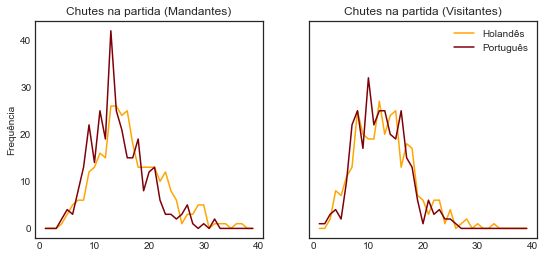

,chutes_mandante_holanda,chutes_mandante_portugal,chutes_visitante_holanda,chutes_visitante_portugal
count,306.000000,306.000000,306.000000,306.000000
mean,15.375817,13.437908,12.006536,11.379085
std,6.002126,5.111645,5.226661,4.565022
min,3.000000,3.000000,2.000000,0.000000
25%,11.250000,10.000000,8.000000,8.000000
50%,14.500000,13.000000,12.000000,11.000000
75%,19.000000,17.000000,15.000000,15.000000
max,36.000000,31.000000,32.000000,25.000000


In [51]:
# Separação para a criação dos gráficos
campeonatos = [holandes, portugues]
cores = ["orange", "#7E0008"]
legenda = ["Holandês", "Português"]

# Montagem dos gráficos
fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4), sharey = True)

for i in range(len(campeonatos)):
    counts1, bins1 = np.histogram(campeonatos[i].HS, bins = range(0, 40, 1))
    counts2, bins2 = np.histogram(campeonatos[i].AS, bins = range(0, 40, 1))
    
    graf1.plot(bins1[:-1] + 1, counts1, color = cores[i], label = legenda[i])
    graf1.set_ylabel('Frequência')
    graf1.set_title('Chutes na partida (Mandantes)')
    
    graf2.plot(bins2[:-1] + 1, counts2, color = cores[i], label = legenda[i])
    graf2.set_title('Chutes na partida (Visitantes)')
    
plt.legend()
plt.show()

# Tabela descritiva
cht = {"chutes_mandante_holanda":holandes.HS, "chutes_mandante_portugal":portugues.HS,
         "chutes_visitante_holanda":holandes.AS, "chutes_visitante_portugal":portugues.AS}

chutes = pd.DataFrame(data = cht)
chutes.describe()

Diversas características dos dados puderam ser levantadas com base nesses recursos:
    
1 - Em ambos os campeonatos, os mandantes tendem a chutarem mais que os visitantes, como evidenciado pela média e os quartis. Entretanto, o desvio padrão também é maior, ou seja, é uma média menos consistente do que dos visitantes.

2 - Os times holandeses costumam ter mais chutes por partida que os portugueses, tendo mais times que chutaram entre 18 a 40 vezes em partidas. Ainda assim, o menor desvio padrão dos clubes da Holanda é dos visitantes, que consegue ser maior do que o desvio padrão dos clubes portugueses que jogam em casa.

3 - O maior valor de chutes numa partida em Portugal é de 31 em um time mandante, que é um valor inferior ao maior número de chutes de um clube visitante holandês com 32.

### Precisão dos chutes na partida

Embora o número de chutes possa refletir bem a qualidade de uma partida, não é exatamente uma regra fixa; pode acontecer uma partida com 4 chutes e 4 gols, bem como uma partida com 30 chutes isolados.

Seguindo essa lógica, os chutes com risco de gol são aqueles que transmitem emoção. Então, criamos uma nova variável "Precisão" para medir quantos chutes são direcionados ao gol em relação ao total. Portanto:

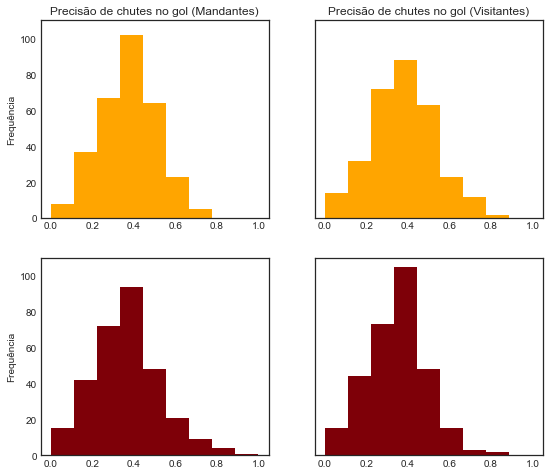

,precisao_mandante_holanda,precisao_visitante_holanda,precisao_mandante_portugal,precisao_visitante_portugal
count,306.000000,306.000000,306.000000,305.000000
mean,0.366567,0.368974,0.358170,0.333777
std,0.138417,0.157187,0.162449,0.142256
min,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.264035,0.250000,0.250000
50%,0.363636,0.363636,0.333333,0.333333
75%,0.466667,0.500000,0.453409,0.428571
max,0.714286,0.800000,1.000000,0.833333


In [52]:
# Criação das listas vazias
precisao_holandes_casa = []
precisao_portugues_casa = []

precisao_holandes_fora = []
precisao_portugues_fora = []

# Atribuindo os devidos valores
for i in range(len(holandes)):
    precisao_casa_hd = holandes.HST[i] / holandes.HS[i]
    precisao_casa_pt = portugues.HST[i] / portugues.HS[i]
    
    precisao_fora_hd = holandes.AST[i] / holandes.AS[i]
    precisao_fora_pt = portugues.AST[i] / portugues.AS[i]
    
    
    precisao_holandes_casa.append(precisao_casa_hd)
    precisao_portugues_casa.append(precisao_casa_pt)
    
    precisao_holandes_fora.append(precisao_fora_hd)
    precisao_portugues_fora.append(precisao_fora_pt)
    
# Juntando as listas
precisoes = [[precisao_holandes_casa, precisao_holandes_fora],
             [precisao_portugues_casa, precisao_portugues_fora]]

# Cores para os gráficos
cores = ["orange", "#7E0008"]

# Montagem dos gráficos
fig, grafs = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8), sharey = True)

bins = np.linspace(0, 1, 10)
for i in range(2):
    for j in range(2):
        grafs[i, j].hist(precisoes[i][j], bins, rwidth = 1, color = cores[i])

local = ["(Mandantes)", "(Visitantes)"]
for i in range(2):
    grafs[0, i].set_title(str("Precisão de chutes no gol " + local[i]))
    grafs[i, 0].set_ylabel("Frequência")

plt.show()

# Tabela descritiva
pcs = {"precisao_mandante_holanda":precisao_holandes_casa, "precisao_visitante_holanda":precisao_holandes_fora,
       "precisao_mandante_portugal":precisao_portugues_casa, "precisao_visitante_portugal":precisao_portugues_fora}

precisao = pd.DataFrame(data = pcs)
precisao.describe()

Dado a análise exploratória desses dados, vemos que:

1 - A precisão dos times não parece ser muito afetada por jogar dentro ou fora de casa. Isso é evidenciado tanto pela médias, desvios padrões, quantis e gráficos dos mandantes e visitantes da mesma liga.

2 - A distribuição dos dados aparenta não ser muito diferente em ambas as ligas, com todas as médias e medianas sendo bem próximas entre si, entre 33 a 37% de precisão. 

### Resultado da partida

Uma maneira comum de medir o quão boa foi uma partida, é pela previsibilidade do seu resultado; afinal, se existe alguma tendência forte para algum lado ganhar, o jogo tende a ser menos emocionante.

Pensando assim, montamos os seguintes gráficos para verificar as porcentagens de vitória para mandantes, visitantes ou empates:

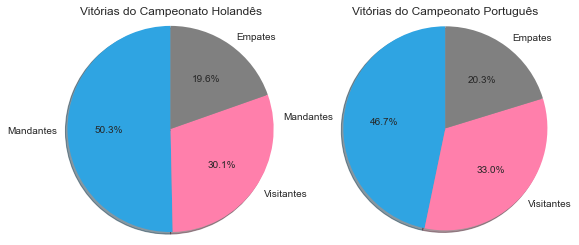

In [53]:
# Criando as vaiáveis
resultados_holandes = [sum(holandes.FTR == "H"), sum(holandes.FTR == "A"), sum(holandes.FTR == "D")]
resultados_portugues = [sum(portugues.FTR == "H"), sum(portugues.FTR == "A"), sum(portugues.FTR == "D")]
# Características dos gráficos
legenda = ["Mandantes", "Visitantes", "Empates"]
cores = ["#2FA4E2", "#FF7FAB", "gray"]

# Montagem do gráfico
fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.pie(resultados_holandes, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)
graf2.pie(resultados_portugues, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)

graf1.axis('equal')
graf2.axis('equal')

graf1.set_title("Vitórias do Campeonato Holandês")
graf2.set_title("Vitórias do Campeonato Português")

plt.show()

Com os gráficos acima, vemos que ambos os campeonatos tem estruturas bem parecidas, em que o time que joga em casa é quem tem maiores chances de ganhar, seguido pela vitória dos visitantes e por fim os empates.

Contudo, o mais interessante seria que o campeonato fosse equiprovável para qualquer resultado, pois tornaria o campeonato mais imprevisível e emocionante. Nesse sentido, a Primeira Liga é quem parece mais balanceado, pois é menos orientado pra vitória dos times da casa do que a Eredivisie.

### Empates com gols

O resultado final de uma partida deveria refletir o quão agitada e emocionante ela foi; contudo, nem sempre o futebol não segue essas regras. 

De maneira geral, há uma grande diferença entre um jogo terminar 0 a 0 e terminar num 3 a 3, ainda que ambos sejam empates e que  existam defensores de "um bom 0 a 0". 

Nesse raciocínio, criamos essa nova variável que mostra quantos empates que foram marcados pelo menos 1 gol para cada lado, e quantos acabaram sem gols. Sendo assim:

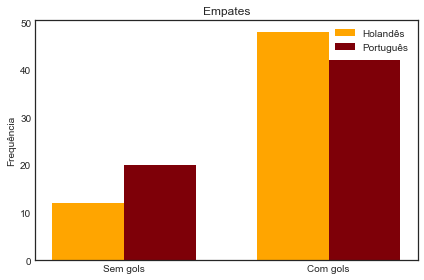

,holandes_empates,portugues_empates
count,60.000000,62.000000
mean,1.266667,1.032258
std,0.989207,0.974557
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.750000
max,4.000000,4.000000


In [54]:
# Criaão das variáveis
empates_hd = holandes[holandes.FTHG == holandes.FTAG]
empates_pt = portugues[portugues.FTHG == portugues.FTAG]

# Removendo os índices
empates_hd.reset_index(inplace = True, drop = True)
empates_pt.reset_index(inplace = True, drop = True)

# Contador
com_gols_hd = 0
com_gols_pt = 0

for jogo in range(len(empates_hd)):
    if empates_hd.FTHG[jogo] != 0:
        com_gols_hd += 1

for jogo in range(len(empates_pt)):
    if empates_pt.FTHG[jogo] != 0:
        com_gols_pt += 1

legenda = ['Sem gols', 'Com gols']
hd = [len(empates_hd) - com_gols_hd, com_gols_hd]
pt = [len(empates_pt) - com_gols_pt, com_gols_pt]

# Gráfico de barras
x = np.arange(len(legenda))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hd, width, label = 'Holandês', color = "orange")
rects2 = ax.bar(x + width/2, pt, width, label = 'Português', color = "#7E0008")

ax.set_ylabel('Frequência')
ax.set_title('Empates')
ax.set_xticks(x)
ax.set_xticklabels(legenda)
ax.legend()

fig.tight_layout()

plt.show()

# Tabela descritiva
empt = {'holandes_empates':empates_hd.FTHG, 'portugues_empates':empates_pt.FTHG}
empates = pd.DataFrame(data = empt)
empates.describe()

Podemos perceber as seguintes curiosidades:

1 - O número total de empates em ambas as ligas foi bem próximo, bem como o desvio padrão e o empate com maior número de gols.

2 - Como demonstrado pelo gráfico, média e 1º quartil, o campeonato holandês tem proporcionalmente bem mais empates com gols do que os times portugueses. Esse é um indício de que a Eredivisie seja mais competitiva e emocionante que a Primeira Liga.

### Faltas na partida

Faltas são muito comuns em partidas de futebol, seja por um estilo de jogo, marcação individual, árbitro pouco leniente ou até mesmo simulações. No entanto, um excesso de faltas marcadas pode tornar o jogo "arrastado", lento e chato; o que redireciona a emoção da partida para brigas e atendimento médico.

Pensando assim, vamos olhar a distribuição de faltas dos campeonatos:

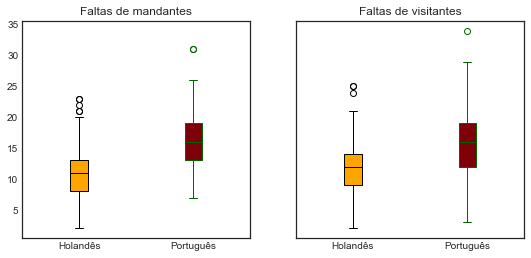

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,10.888889,16.477124,11.751634,15.960784
std,3.551136,4.430276,3.660657,4.794645
min,2.000000,7.000000,2.000000,3.000000
25%,8.000000,13.000000,9.000000,12.000000
50%,11.000000,16.000000,12.000000,16.000000
75%,13.000000,19.000000,14.000000,19.000000
max,23.000000,31.000000,25.000000,34.000000


In [55]:
# Listas com as variáveis que serão utilizadas
faltas_dentro = [holandes.HF, portugues.HF]
faltas_fora = [holandes.AF, portugues.AF]
faltas = [faltas_dentro, faltas_fora]

# Detalhes dos gráficos
cores = ["orange", "#7E0008", "black", "#006400"]
legendas = ["Holandês", "Português"]
local = ["mandantes", "visitantes"]

# Montagem dos gráficos
fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4), sharey = True)
grafs = (graf1, graf2)

for i in range(2):
    for j in range(2):
        grafs[j].boxplot(faltas[j][i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 2]),
                               capprops = dict(color = cores[i + 2]),
                               whiskerprops = dict(color = cores[i + 2]),
                               flierprops = dict(color = cores[i + 2], markeredgecolor = cores[i + 2]),
                               medianprops = dict(color = cores[i + 2]))
for i in range(2):
    grafs[i].set_title(str('Faltas de ' + local[i]))
    grafs[i].set_xticklabels(["Holandês", "Português"])

plt.show()

# Tabela descritiva
flt = {'holandes_casa':holandes.HF, 'portugues_casa':portugues.HF,
        'holandes_fora':holandes.AF, 'portugues_fora':portugues.AF}

faltas = pd.DataFrame(data = flt)

faltas.describe()

Com os recursos utilizados, vemos que:

1 - Os times portugueses são mais propícios a cometer faltas do que os holandeses, o que configura como um ponto positivo para a Eredivisie.

2 - Jogar dentro ou fora de casa não aparenta impactar muito nas faltas, já que os valores de média e quartis tendem a ficar relativamente próximos.

### Cartões amarelos e vermelhos

Agora iremos analisar a intensidade das faltas e o nível disciplinar dos atletas, para isso iremos ver a soma de cartões em cada campeonato.

In [56]:
# Criação da tabela
dados1 = {"Eredivisie": [sum(holandes.HY), sum(holandes.AY), sum(holandes.HR), sum(holandes.AR)],
          "Primeira Liga": [sum(portugues.HY), sum(portugues.AY), sum(portugues.HR), sum(portugues.AR)]}

df = pd.DataFrame(dados1,
                  index =['Cartões amarelos Mandantes','Cartões amarelos Visitantes',
                          'Cartões vermelhos Mandantes','Cartões vermelhos visitantes'],)  
df

,Eredivisie,Primeira Liga
Cartões amarelos Mandantes,415,690
Cartões amarelos Visitantes,510,804
Cartões vermelhos Mandantes,27,46
Cartões vermelhos visitantes,40,52


Em todos os quesitos a Primeira liga teve valores maiores que a Eredivisie, isso pode indicar que o campeonato português tenha jogos mais físicos ou a tolerância dos arbitros em relação à faltas seja menor em Portugal.

## Testes de hipóteses

Uma das ferramentas estatísticas mais comuns são os testes de hipóteses. Eles consistem em testar alguma medida descritiva da(s) amostra(s) ou população(ões), sob as hipóteses inicial e alternativa; então, é calculado uma estatística do teste e, com base em um valor crítico de distribuição ou no p-valor associado, tomamos a decisão de rejeitar ou não a hipótese inicial.

Aqui, todos os testes serão decididos com um nível de significância $\alpha$ = 0.05, que será comparado com o p-valor calculado pelo teste.

### Média de gols por partida dos campeonatos

Embora exista alguns contrapontos, é quase um consenso que quanto mais gols uma partida tiver, melhor e mais agradável de assistir ela será. Dessa forma, estamos interessados em saber se o campeonato holandês tem sua média de gols por jogo maior do que a do campeonato português. 

O teste adequado para isso é o t-student para amostras independentes, pois não conhecemos a variância populacional dos campeonatos (estamos olhando os dados de apenas uma temporada) e os dados dos campeonatos são independentes por natureza. 

Portanto, o primeiro passo é verificar se a variância dos gols dos campeonatos é igual ou significativamente diferentes:

**Teste de Levene para igualdade de variâncias**

$$ S_{Holandês}^2 = 3.64, S_{Português}^2 = 3.19 $$

$H_0)$ A variância dos gols por partida na Eredivisie é igual que da Primeira Liga

$H_1)$ A variância dos gols por partida na Eredivisie não é igual que da Primeira Liga

In [57]:
# Lista que irão receber os valores dos gols na partida
gols_partida_holandes = []
gols_partida_portugues = []

# Adicionando os valores
for i in range(len(holandes)):
    gols_partida_holandes.append(holandes.FTHG[i] + holandes.FTAG[i])
    gols_partida_portugues.append(portugues.FTHG[i] + portugues.FTAG[i])

# Calculando o teste de Levene
est.levene(gols_partida_holandes, gols_partida_portugues)

LeveneResult(statistic=1.1025303976339107, pvalue=0.29412726574780607)

Como estamos usando um nível de significância $\alpha = 0.05$ e o p-valor calculado foi de 0.29, não temos evidências suficientes para rejeitar a hipótese de igualdade de variâncias. Sendo assim, podemos realizar o teste paramétrico de médias:

**Teste t para médias de amostras independentes**

$$ \bar{X}_{Holandês} = 3.47, \bar{X}_{Português} = 2.7 $$


$H_0)$ A média dos gols por partida na Eredivisie é menor ou igual que da Primeira Liga

$H_1)$ A média dos gols por partida na Eredivisie é maior que da Primeira Liga

In [126]:
est.ttest_ind(gols_partida_holandes, gols_partida_portugues)

Ttest_indResult(statistic=5.138717667560027, pvalue=3.7289940001234133e-07)

O teste calculou o p-valor de um teste bilateral e estamos interessados em um teste unilateral, basta dividir o p-valor calculado por dois.

Então, como p-valor = $1.865 x 10^{-7} < \alpha $, podemos rejeitar a hipótese nula e acreditar que a média de gols da Eredivisie é maior que da Primeira Liga, o que é um ponto a favor do campeonato Holandês.

### Média de chutes no gol por partida dos campeonatos

Outro fator importante para tornar uma partida bacana, é a quantidade de chutes com risco de gol nela; até porque, apenas toque de bola e chutes isolados causam tédio e desinteresse. 

Vale ressaltar que, como a média dos gols da Eredivisie é significativamente maior que da Primeira Liga, é esperado que a quantidade de chutes no gol também seja. Contudo, caso esse teste não seja significativo, é um indício que a defesa dos portugueses é superior a dos holandeses.

Assim sendo, temos primeiro o teste de Levene:

**Teste de Levene para igualdade de variâncias**

$$ S_{Holandês}^2 = 11.24, S_{Português}^2 = 9.1 $$

$H_0)$ A variância dos chutes no gol por partida na Eredivisie é igual que da Primeira Liga

$H_1)$ A variância dos chutes no gol por partida na Eredivisie não é igual que da Primeira Liga

In [127]:
# Listas que receberão os valores
chutegol_partida_holandes = []
chutegol_partida_portugues = []

# Adicionando os valores
for i in range(len(holandes)):
    chutegol_partida_holandes.append(holandes.HST[i] + holandes.AST[i])
    chutegol_partida_portugues.append(portugues.HST[i] + portugues.AST[i])

# Calculando a estatística
est.levene(chutegol_partida_holandes, chutegol_partida_portugues)

LeveneResult(statistic=4.551380296804311, pvalue=0.033290601329870155)

Como o p-valor de 0.03 foi menor que $\alpha = 0.05$ rejeitamos $H_0$, ou seja, a variância dos chutes no gol dos dois campeonatos não é igual. Vale ressaltar que o p-valor foi relativamente próximo do nível de significância, então é uma decisão um pouco ambígua.

Então, vamos para o teste t para variâncias diferentes:

**Teste t para médias de amostras independentes**

$$ \bar{X}_{Holandês} = 10.22, \bar{X}_{Português} = 8.49 $$

$H_0)$ A média de chutes no gol por partida na Eredivisie é menor ou igual que da Primeira Liga

$H_1)$ A média de chutes no gol por partida na Eredivisie é maior que da Primeira Liga

In [128]:
est.ttest_ind(chutegol_partida_holandes, chutegol_partida_portugues, equal_var = False)

Ttest_indResult(statistic=6.7421566814751515, pvalue=3.6564779256112844e-11)

Novamente, precisamos dividir o p-valor por dois, para ter o p-valor do teste unilateral; dessa forma, temos um p-valor igual a $1.83 x 10^{-11} < 0.05$. Portanto, rejeitamos a hipótese nula e afirmamos que a média de chutes no gol por partida do campeonato holandês é maior do que a do português, como esperado.

### Média de faltas por partida dos campeonatos

A última variável que faremos um teste t de médias é para as faltas por partida dos campeonatos. Como dito anteriormente, um número elevado de faltas pode tornar uma partida lenta e chata, contando como um ponto negativo caso alguma média seja significativamente maior do que a do outro torneio. Portanto:

**Teste de Levene para igualdade de variâncias**

$$ S_{Holandês}^2 = 27.53, S_{Português}^2 = 46.58 $$

$H_0)$ A variância das faltas por partida na Eredivisie é igual que da Primeira Liga

$H_1)$ A variância das faltas no gol por partida na Eredivisie não é igual que da Primeira Liga

In [58]:
# Lista que irá receber os valores
faltas_partida_holandes = []
faltas_partida_portugues = []

# Adicionando os valores
for i in range(len(holandes)):
    faltas_partida_holandes.append(holandes.HF[i] + holandes.AF[i])
    faltas_partida_portugues.append(portugues.HF[i] + portugues.AF[i])

# Calculando a estatística
est.levene(faltas_partida_holandes, faltas_partida_portugues)

LeveneResult(statistic=19.770102052259723, pvalue=1.0377805367015378e-05)

Como o p-valor de $1.04 x 10^{-5}$ é menor do que o nível de significância utilizado, podemos rejeitar $H_{0}$ e dizer que a variância das faltas dos dois torneios são diferentes. Agora, vamos realizar o teste de médias apropriado:

**Teste t para médias de amostras independentes**

$$ \bar{X}_{Português} = 32.44, \bar{X}_{Holandês} = 22.64 $$

$H_0)$ A média de faltas por partida na Primeira Liga é menor ou igual que da Eredivisie

$H_1)$ A média de faltas por partida na Primeira Liga é maior que da Eredivisie

In [130]:
est.ttest_ind(faltas_partida_portugues, faltas_partida_holandes, equal_var = False)

Ttest_indResult(statistic=19.90812323476125, pvalue=2.1054317703807706e-67)

Em um nível de significância de 5%, rejeitamos a hipótese inicial com p-valor igual a $2.105 x 10^{-67}$. Isso é, temos evidências para acreditar que a média de faltas do campeonato português é superior a do holandês, o que conta como um ponto negativo para a Primeira Liga.

### Correlação entre odds e chutes na partida

Por fim, o último teste de hipóteses que será feito é para o $\rho$ de Spearman, entre as variáveis Odds e chutes na partida. De maneira simplificada, o que queremos ver aqui é se as odds, que refletem as chances de um time ganhar, tem correlação significativa com a quantidade de chutes que aquele time realizou na partida.

Como as odds são em escala inversa, isso é, quanto menor ela for melhores as chances do clube ganhar, uma correlação negativa significa que quanto mais ofensivo o time for, maiores as chances dele ser o vencedor e vice versa.

Ou seja, o intuito desses teste é verificar se o campeonato holandês ou português favorecem times ofensivos, que são emocionantes de ver, ou times retranqueiros que tendem a ser mais entediantes. Então:

**Teste de correlação de Spearman**

$H_0)$ Chutes no gol e as odds do time na partida não são correlacionados

$H_1)$ Chutes no gol e as odds do time na partida são correlacionados

In [59]:
pais = ["holandeses", "portugueses"]
liga = [holandes, portugues]

for i in range(2):
    print("Para times", pais[i], "mandantes, o teste resultou em: \n", est.spearmanr(liga[i].HS, liga[i].B365H))

    print()

    print("Para times", pais[i], "visitantes, o teste resultou em: \n", est.spearmanr(liga[i].AS, liga[i].B365A))

    print()

Para times holandeses mandantes, o teste resultou em: 
 SpearmanrResult(correlation=-0.5416151037050979, pvalue=1.005661149528596e-24)

Para times holandeses visitantes, o teste resultou em: 
 SpearmanrResult(correlation=-0.5364635338089871, pvalue=3.336554459751448e-24)

Para times portugueses mandantes, o teste resultou em: 
 SpearmanrResult(correlation=-0.4495786462509455, pvalue=1.248358885165716e-16)

Para times portugueses visitantes, o teste resultou em: 
 SpearmanrResult(correlation=-0.43010764445678035, pvalue=3.289139906438734e-15)



Usando o nível de significância $\alpha$, rejeitamos $H_0$ em todos os quatro testes realizados. Então, temos correlação entre as chances do time sair vitorioso e quantos chutes ele tem na partida. Organizando os $rho$ em uma tabela para melhorar a visualização, temos:

In [132]:
rhos = {"Mandantes": [-0.542, -0.45], "Visitantes": [-0.536, -0.43]}

corr = pd.DataFrame(rhos, index = ['Eredivisie','Primeira Liga']) 
                                  
corr

,Mandantes,Visitantes
Eredivisie,-0.542,-0.536
Primeira Liga,-0.450,-0.430


Vemos então que na Eredivisie, a correlação de ambos os lados foi mais forte do que no campeonato português, o que significa que o torneio da Holanda favorece ainda mais um estilo de jogo ofensivo para o vencedor, em relação com a Primeira Liga.

## Análise de Cluster

O objetivo desta análise é agrupar as equipes com base na soma dos odds(retirando o empate), e também com gols marcados e sofridos. O método utilizado será o de aglomeração hierárquico de Ward, baseado na minimização da "perda de informação" da junção de 2 grupos.


### Análise de Cluster com os odds
Para esta análise iremos utilizar os odds para uma equipe ser vitoriosa(odds mandante x odds visitante). Primeiro faremos a análise dentro de cada liga, e em seguida faremos com todas as equipes.

#### Liga holandesa(Eredivisie)

Primeiro faremos um dendograma para termos uma ideia de quantos clusters serão formados.

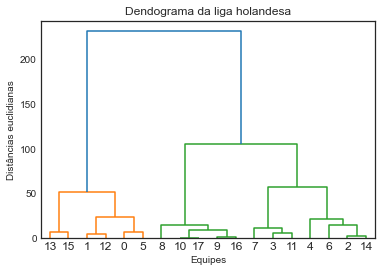

In [33]:
# odds como mandante
A = holandes.groupby("HomeTeam").sum().sort_values(["B365H"], ascending = True).B365H
# odds como visitante
B = holandes.groupby("AwayTeam").sum().sort_values(["B365A"],ascending = True).B365A
# dataframe com as 2 variáveis
ere = pd.DataFrame(data={'Odds como mandante': A, 'Odds como visitante': B})
# Criar o dendograma com as distâncias euclidianas
dendrograma = sch.dendrogram (sch.linkage (ere, method = "ward")) 
plt.title ('Dendograma da liga holandesa') 
plt.xlabel ('Equipes') 
plt.ylabel ('Distâncias euclidianas') 
plt.show ()

Analisando o dendograma vemos que pode ser formado 4 clusters. Agora iremos plotar os clusters formados.

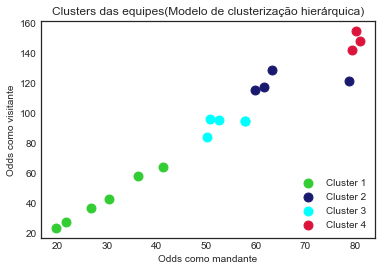

,Odds como mandante,Odds como visitante,Cluster
Ajax,19.59,23.34,1
PSV Eindhoven,21.58,27.43,1
Feyenoord,26.76,36.69,1
AZ Alkmaar,30.38,43.12,1
Vitesse,36.22,58.42,1
Utrecht,41.15,64.17,1
Den Haag,59.82,115.09,2
VVV Venlo,61.65,117.16,2
For Sittard,63.24,128.95,2
FC Emmen,78.84,121.27,2


In [43]:
# Regra de separação
hc = AgglomerativeClustering (n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# Selecionando somente os valores do dataframe
X = ere.iloc[:, [0,1]].values
# Aplicando a regra
y_hc = hc.fit_predict(X)

# Gráfico de dispersão com os clusters formados
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1],s=80, c='limegreen', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1],s=80, c='midnightblue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=80,c='cyan', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1],s=80, c='crimson', label ='Cluster 4')
plt.title ('Clusters das equipes(Modelo de clusterização hierárquica)') 
plt.xlabel ('Odds como mandante') 
plt.ylabel ('Odds como visitante') 
plt.legend(loc="lower right", title="")
plt.show()

# Tabela com as equipes e clusters formados
ere["Cluster"] = y_hc+1
ere.sort_values(["Cluster", "Odds como mandante"], ascending = True)

Analisando os clusters formados vemos que o primeiro é formado por 6 equipes(as favoritas do campeonato), porém as 2 primeiras equipes estão um pouco longe das demais, provavelmente são as equipes que brigaram pelo título. No segundo e terceiro temos 5 e 4 equipes respectivamente, e no quarto temos 3 equipes(as piores do campeonato).

#### Liga portuguesa(Primeira liga)
Primeiro veremos o dendograma para definir o número de clusters.

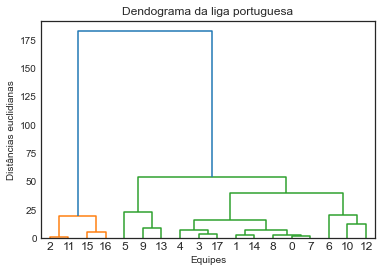

In [39]:
# odds como mandante
C = portugues.groupby("HomeTeam").sum().sort_values(["B365H"], ascending = True).B365H
# odds como visitante
D = portugues.groupby("AwayTeam").sum().sort_values(["B365A"],ascending = True).B365A
# dataframe com as 2 variáveis
nos = pd.DataFrame(data={'Odds como mandante': C, 'Odds como visitante': D})
# Criar o dendograma com as distâncias euclidianas
dendrograma = sch.dendrogram (sch.linkage (nos, method = "ward")) 
plt.title ('Dendograma da liga portuguesa') 
plt.xlabel ('Equipes') 
plt.ylabel ('Distâncias euclidianas') 
plt.show ()

Neste caso será formado 4 clusters. Agora representando no gráfico.

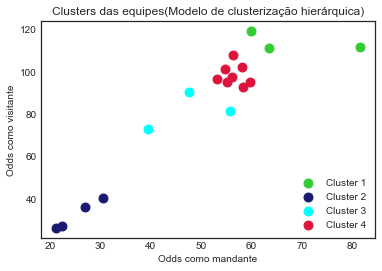

,Odds como mandante,Odds como visitante,Cluster
Santa Clara,59.93,119.40,1
Nacional,63.60,111.38,1
Feirense,81.62,111.93,1
Porto,21.13,26.02,2
Benfica,22.31,27.08,2
Sp Lisbon,27.01,36.24,2
Sp Braga,30.49,40.55,2
Guimaraes,39.51,72.85,3
Portimonense,47.61,90.45,3
Rio Ave,55.83,81.42,3


In [42]:
# Regra de separação
hc = AgglomerativeClustering (n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# Selecionando somente os valores do dataframe
X = nos.iloc[:, [0,1]].values
# Aplicando a regra
y_hc = hc.fit_predict(X)

# Gráfico de dispersão com os clusters formados
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1],s=80, c='limegreen', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1],s=80, c='midnightblue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=80,c='cyan', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1],s=80, c='crimson', label ='Cluster 4')
plt.title ('Clusters das equipes(Modelo de clusterização hierárquica)') 
plt.xlabel ('Odds como mandante') 
plt.ylabel ('Odds como visitante') 
plt.legend(loc="lower right", title="")
plt.show()

# Tabela com as equipes e clusters formados
nos["Cluster"] = y_hc+1
nos.sort_values(["Cluster", "Odds como mandante"], ascending = True)

O primeiro cluster é formado pelas 3 piores equipes do campeonato, interessante notar que a soma dos seus odds são menores que as 3 piores do holandês, ou seja, as probabilidades das piores equipes de Portugal vencer são maiores do que as da Holanda. O segundo cluster é formado pelas 4 melhores equipes, no holandês eram 6. O terceiro cluster tem 3 equipes intermediárias, já o quarto é formado por 8 equipes, e podemos perceber que todas estão muito próximas, isso pode ser um indício de que o nível delas é parecido. Pórem, a distância das equipes favoritas em comparação com as demais é maior do que no campeonato holandês.

#### Ambas as ligas

Agora iremos juntar os odds de todas as equipes para ver os grupos formados. Observando o dendograma para definir o número de clusters.

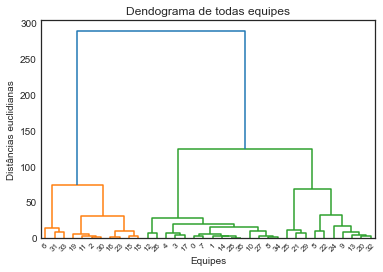

In [44]:
# Juntando as variáveis
ambas = nos.append(ere)
# Criar o dendograma com as distâncias euclidianas
dendrograma = sch.dendrogram (sch.linkage (ambas, method = "ward")) 
plt.title ('Dendograma de todas equipes') 
plt.xlabel ('Equipes') 
plt.ylabel ('Distâncias euclidianas') 
plt.show ()

Também formaremos 4 clusters. Criando o gráfico.

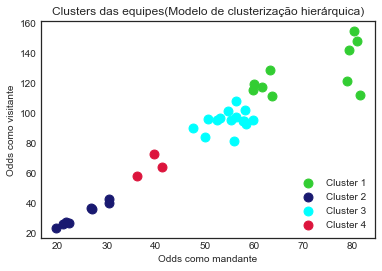

,Odds como mandante,Odds como visitante,Cluster
Den Haag,59.82,115.09,1
Santa Clara,59.93,119.40,1
VVV Venlo,61.65,117.16,1
For Sittard,63.24,128.95,1
Nacional,63.60,111.38,1
FC Emmen,78.84,121.27,1
Excelsior,79.32,142.05,1
Graafschap,80.27,154.80,1
NAC Breda,81.02,148.20,1
Feirense,81.62,111.93,1


In [45]:
# Regra de separação
hc = AgglomerativeClustering (n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# Selecionando somente os valores do dataframe
X = ambas.iloc[:, [0,1]].values
# Aplicando a regra
y_hc = hc.fit_predict(X)

# Gráfico de dispersão com os clusters formados
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1],s=80, c='limegreen', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1],s=80, c='midnightblue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=80,c='cyan', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1],s=80, c='crimson', label ='Cluster 4')
plt.title ('Clusters das equipes(Modelo de clusterização hierárquica)') 
plt.xlabel ('Odds como mandante') 
plt.ylabel ('Odds como visitante') 
plt.legend(loc="lower right", title="")
plt.show()

# Tabela com as equipes e clusters formados
ambas["Cluster"] = y_hc+1
ambas.sort_values(["Cluster", "Odds como mandante"], ascending = True)

O primeiro cluster é formado pelas piores equipes de ambos os campeonatos, porém há 7 equipes holandesas contra 3 portuguesas. O segundo cluster(melhores equipes) ficou bem dividido, com 4 equipes para cada lado. O terceiro cluster tem 10 equipes portuguesas e 5 holandesas, e o quarto tem 2 holandesas e 1 poruguesa.
Com isso é possível notar que no campeonato português há um espaço maior entre as melhores equipes e as intermediárias. Já no holandês há mais equipes que brigam pela parte de cima da tabela, porém isso faz com que as equipes da parte de baixo sejam piores do que as de Portugal.

### Análise de Cluster com os gols

Agora iremos agrupar todas as equipes com base na soma dos gols marcados e sofridos. Primeiro veremos quantos clusters são necessários.

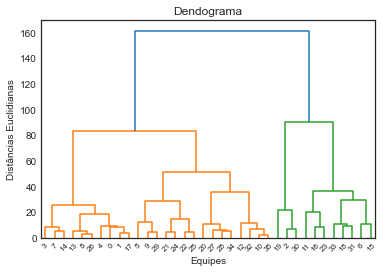

In [46]:
## Português
# gols marcados em casa
gmc = portugues.groupby("HomeTeam").sum().sort_values(["FTHG"], ascending = False).FTHG
# gols marcados fora
gmf = portugues.groupby("AwayTeam").sum().sort_values(["FTAG"], ascending = False).FTAG
# gols sofridos em casa
gsc = portugues.groupby("HomeTeam").sum().sort_values(["FTAG"], ascending = False).FTAG
# gols sofridos fora
gsf = portugues.groupby("AwayTeam").sum().sort_values(["FTHG"], ascending = False).FTHG

## Holandês
# gols marcados em casa
gmc1 = holandes.groupby("HomeTeam").sum().sort_values(["FTHG"], ascending = False).FTHG
# gols marcados fora
gmf1 = holandes.groupby("AwayTeam").sum().sort_values(["FTAG"], ascending = False).FTAG
# gols sofridos em casa
gsc1 = holandes.groupby("HomeTeam").sum().sort_values(["FTAG"], ascending = False).FTAG
# gols sofridos fora
gsf1 = holandes.groupby("AwayTeam").sum().sort_values(["FTHG"], ascending = False).FTHG

# Dataframe com os gols no português
nosg = pd.DataFrame(data={'Gols marcados': gmc + gmf, 'Gols sofridos': gsc+ gsf})
# Dataframe com os gols no holandês
ereg = pd.DataFrame(data={'Gols marcados': gmc1 + gmf1, 'Gols sofridos': gsc1+ gsf1})
# Dataframe com ambas as ligas
ambasg = nosg.append(ereg)

# Dendograma com ambas as ligas
dendrogram = sch.dendrogram (sch.linkage (ambasg, method = "ward")) 
plt.title('Dendograma') 
plt.xlabel('Equipes') 
plt.ylabel('Distâncias Euclidianas') 
plt.show ()



Pelo dendograma é possível notar que a melhor opção é formar 5 clusters. 

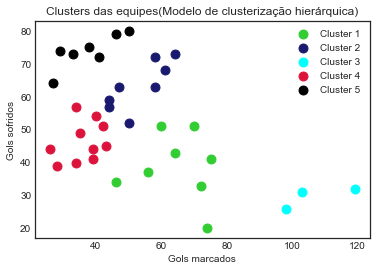

,Gols marcados,Gols sofridos,Cluster
For Sittard,50,80,5
Excelsior,46,79,5
FC Emmen,41,72,5
Graafschap,38,75,5
Nacional,33,73,5
NAC Breda,29,74,5
Feirense,27,64,5
Santa Clara,43,45,4
Belenenses,42,51,4
Tondela,40,54,4


In [60]:
# Regra de separação
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# Selecionando somente os valores do dataframe
X = ambasg.iloc[:, [0,1]].values
# Aplicando a regra
y_hc = hc.fit_predict(X)

# Gráfico de dispersão com os clusters formados
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1],s=80, c='limegreen', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1],s=80, c='midnightblue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=80,c='cyan', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1],s=80, c='crimson', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1],s=80, c='black', label ='Cluster 5')
plt.title ('Clusters das equipes(Modelo de clusterização hierárquica)') 
plt.xlabel ('Gols marcados') 
plt.ylabel ('Gols sofridos') 
plt.legend(loc="upper right", title="")
plt.show()

# Tabela com as equipes e clusters formados
ambasg["Cluster"] = y_hc+1
ambasg.sort_values(["Cluster", "Gols marcados"], ascending = False)

O cluster 3 é formado pelas equipes mais ofensivas e que sofreram poucos gols, ele é formado por 2 equipes holandesas e 1 portuguesa. No cluster 1 temos equipes que tiveram um saldo de gols positivo, ou seja, marcaram mais gols do que sofreram, ele está dividido por igual. Os clusters 2 e 4 são parecidos, são times com o saldo de gols negativo, porém as equipes do cluster 2 marcam mais gols e sofrem mais também. A maioria das equipes do cluster 2 são holandesas, já no 4 só há uma. Isso mostra que as equipes portuguesas parecem saber defender melhor, mas atacam pior. O cluster 5 é formado pelas piores equipes, elas marcam poucos gols e sofrem muito, neste cluster há 5 equipes holandesas e 2 portuguesas.  

## Conclusão

Levando em consideração todo o estudo realizado, conseguimos levantar os seguintes pontos positivos de cada campeonato:

**Eredivisie**

Na análise descritiva:

* Odds de empate, pois a chance de acontecer um empate na Holanda são menores.
* Gols por jogo, porque tem as medidas mais elevadas.
* Empates com gol, porque ocorrem menos 0 a 0 na Holanda.
* Faltas por jogo, pois os jogadores cometem menos faltas.

Nos teste de hipóteses:

* Média de gols superior.
* Média de chutes ao gol superior.
* Média de faltas inferior.

Na análise de cluster de odds:

* Tem mais equipes próximas do grupo dos melhores clubes holandeses.

Na análise de cluster de gols:

* Os clubes da Eredivisie são mais ofensivos e fazem mais gols.


**Primeira Liga**

Na análise descritiva:

* Odds de vitória, pois é mais equilibrado, com mais clubes com boas odds de vitória.
* Proporção de resultados, porque é menos tendencioso a uma vitória do mandante.

Na análise de cluster de odds:

* Possui mais equipes com nível parecido dentro dos grupos, embora seja maior a distância de qualidade entre os grupos.
* As equipes portuguesas se saem melhor quando agrupados com as holandesas.
* Os três piores clubes portugueses são mais competitivos do que os três piores da Holanda.

Na análise de cluster de gols:

* Os times portugueses são menos ofensivos, mas tem defesas de melhor qualidade.


Tendo em mente os pontos acima, é possível considerarmos o campeonato holandês melhor do que o de Portugal, pois teve desempenho superior em mais aspectos. Além disso, a Eredivisie também possui menor frequência de cartões e uma correlação maior entre chances de vitória e ofensividade. Dessa maneira, é torneio que escolhemos como o melhor dentre ambos, e o 6º melhor da Europa.

Contudo, é perfeitamente plausível que o leitor acredite que, embora a Primeira Liga tenha menos pontos favoráveis, esses sejam de maior peso e impacto. Sendo assim, temos duas recomendações:

* Caso você goste de assistir as equipes de maior qualidade possível, provavelmente achará a Eredivisie melhor.
* Se você preferir um campeonato mais equilibrado, onde as equipes intermediárias são mais competitivas, a Primeira Liga será mais atrante.

## Referências

* Netherlands Football Results and Betting Odds. In: Football-Data. Disponível em: https://www.football-data.co.uk/netherlandsm.php. Acesso em: Maio de 2021.
* Portugal Football Results and Betting Odds. In: Football-Data. Disponível em: https://www.football-data.co.uk/portugalm.php. Acesso em: Maio de 2021.
* Gallery. In: MATPLOTLIB, 2021. Disponível em: https://matplotlib.org/stable/gallery/index.html. Acesso em: Maio de 2021.
* Statistics (scipy.stats). In: SciPy, 2021. Disponível em: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html. Acesso em: Maio de 2021.
* Hierarchical Clustering Model in 5 Steps with Python. In: Samet Girgin, 2021. Disponível em: https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318. Acesso em: Maio de 2021.
* O que são odds – Guia de Apostas OddsShark Brasil #2. In: Odds Shark, 2021. Disponível em: https://www.oddsshark.com/br/como-apostar/o-que-sao-odds. Acesso em: Maio de 2021.
*  “Aulas do Prof Eduardo Monteiro - CE2 2/2020.” UnB; website. https://teams.microsoft.com/_#/school/conversations/Geral?threadId=19:31fb2d5f5afe4fae8c90d24609f5c4ab@thread.tacv2&ctx=channel. Acesso em: Maio de 2021.
* Stephenson B. 2019. The Python Workbook A Brief Introduction with Exercises and Solutions. Springer International Publishing
* Bussab W., Morettin P. 2017. Estatística Básica. Vol. 9. Editora Saraiva.
* Conover, W.J. 1998. Practical Nonparametric Statistics. Vol. 3. John Wiley & Sons.
*  “Slides e aulas do Prof Alan Ricardo - Multivariada 2/2020.” UnB; website. https://sig.unb.br/sigaa/portais/discente/discente.jsf. Acesso em: Maio de 2021.